## Задание 2: Анализ архитектур CNN (30 баллов)

In [5]:
import torch
from convolutional_basics.datasets import get_mnist_loaders, get_cifar_loaders
from convolutional_basics.models import SimpleCNN, CNNWithResidual, CIFARCNN
from convolutional_basics.trainer import train_model
from convolutional_basics.utils import plot_training_history, count_parameters
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

### 2.1 Влияние размера ядра свертки (15 баллов)
```python
# Исследуйте влияние размера ядра свертки:
# - 3x3 ядра
# - 5x5 ядра
# - 7x7 ядра
# - Комбинация разных размеров (1x1 + 3x3)
# 
# Для каждого варианта:
# - Поддерживайте одинаковое количество параметров
# - Сравните точность и время обучения
# - Проанализируйте рецептивные поля
# - Визуализируйте активации первого слоя
```

In [9]:
device = torch.device('cpu')
train_loader, test_loader = get_mnist_loaders(batch_size=64)

In [6]:
class SimpleCNN(nn.Module):
    def __init__(self, kernel_size=3, input_channels=1, num_classes=10):
        super().__init__()
        
        # Для комбинации слоев не вычисляем padding
        if kernel_size == "combo":
            self.conv1 = nn.Sequential(
                nn.Conv2d(input_channels, 16, kernel_size=1, padding=0),
                nn.ReLU(),
                nn.Conv2d(16, 24, kernel_size=3, padding=1)
            )
            self.conv2 = nn.Conv2d(24, 64, kernel_size=3, padding=1)
            channels = [24, 64]
        else:
            # Для обычных ядер вычисляем padding
            padding = kernel_size // 2
            
            # Подбираем количество каналов для сохранения параметров
            if kernel_size == 3:
                channels = [32, 64]
            elif kernel_size == 5:
                channels = [24, 61]
            elif kernel_size == 7:
                channels = [16, 60]
            
            self.conv1 = nn.Conv2d(input_channels, channels[0], kernel_size, padding=padding)
            self.conv2 = nn.Conv2d(channels[0], channels[1], kernel_size, padding=padding)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(channels[1] * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
CNN_3x3 = SimpleCNN(kernel_size=3, input_channels=1, num_classes=10)
CNN_5x5 = SimpleCNN(kernel_size=5, input_channels=1, num_classes=10)
CNN_7x7 = SimpleCNN(kernel_size=7, input_channels=1, num_classes=10)
CNN_combo = SimpleCNN(kernel_size="combo", input_channels=1, num_classes=10)

CNNs = [CNN_3x3, CNN_5x5, CNN_7x7, CNN_combo]

In [ ]:

print(f"3x3 params: {count_parameters(CNN_3x3):,}")
print(f"5x5 params: {count_parameters(CNN_5x5):,}")
print(f"7x7 params: {count_parameters(CNN_7x7):,}")
print(f"Combo params: {count_parameters(CNN_combo):,}")

3x3 params: 421,642
5x5 params: 421,295
7x7 params: 425,638
Combo params: 420,226


In [16]:
print(f"Simple CNN parameters: {count_parameters(CNN_3x3)}")

print("Training CNN_3x3...")
CNN_3x3_history = train_model(CNN_3x3, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 421642
Training CNN_3x3...


100%|██████████| 157/157 [00:04<00:00, 39.14it/s]


Epoch 1/5:
Train Loss: 0.1482, Train Acc: 0.9538
Test Loss: 0.0411, Test Acc: 0.9868
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 36.70it/s]


Epoch 2/5:
Train Loss: 0.0524, Train Acc: 0.9841
Test Loss: 0.0345, Test Acc: 0.9878
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.58it/s]


Epoch 3/5:
Train Loss: 0.0379, Train Acc: 0.9882
Test Loss: 0.0314, Test Acc: 0.9888
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.74it/s]


Epoch 4/5:
Train Loss: 0.0282, Train Acc: 0.9913
Test Loss: 0.0246, Test Acc: 0.9916
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 41.09it/s]

Epoch 5/5:
Train Loss: 0.0236, Train Acc: 0.9924
Test Loss: 0.0239, Test Acc: 0.9905
--------------------------------------------------


In [17]:
print(f"Simple CNN parameters: {count_parameters(CNN_5x5)}")

print("Training CNN_5x5...")
CNN_5x5_history = train_model(CNN_5x5, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 421295
Training CNN_5x5...


100%|██████████| 157/157 [00:03<00:00, 40.19it/s]


Epoch 1/5:
Train Loss: 0.1595, Train Acc: 0.9511
Test Loss: 0.0527, Test Acc: 0.9819
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.81it/s]


Epoch 2/5:
Train Loss: 0.0527, Train Acc: 0.9838
Test Loss: 0.0271, Test Acc: 0.9908
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.10it/s]


Epoch 3/5:
Train Loss: 0.0369, Train Acc: 0.9886
Test Loss: 0.0250, Test Acc: 0.9917
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 41.07it/s]


Epoch 4/5:
Train Loss: 0.0288, Train Acc: 0.9908
Test Loss: 0.0297, Test Acc: 0.9901
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.82it/s]

Epoch 5/5:
Train Loss: 0.0232, Train Acc: 0.9926
Test Loss: 0.0290, Test Acc: 0.9919
--------------------------------------------------


In [18]:
print(f"Simple CNN parameters: {count_parameters(CNN_7x7)}")

print("Training CNN_7x7...")
CNN_7x7_history = train_model(CNN_7x7, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 425638
Training CNN_7x7...


100%|██████████| 157/157 [00:03<00:00, 41.10it/s]


Epoch 1/5:
Train Loss: 0.1534, Train Acc: 0.9520
Test Loss: 0.0417, Test Acc: 0.9857
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 41.58it/s]


Epoch 2/5:
Train Loss: 0.0520, Train Acc: 0.9840
Test Loss: 0.0352, Test Acc: 0.9887
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 42.15it/s]


Epoch 3/5:
Train Loss: 0.0377, Train Acc: 0.9883
Test Loss: 0.0237, Test Acc: 0.9914
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.80it/s]


Epoch 4/5:
Train Loss: 0.0277, Train Acc: 0.9915
Test Loss: 0.0304, Test Acc: 0.9908
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 41.88it/s]

Epoch 5/5:
Train Loss: 0.0239, Train Acc: 0.9925
Test Loss: 0.0266, Test Acc: 0.9926
--------------------------------------------------


In [19]:
print(f"Simple CNN parameters: {count_parameters(CNN_combo)}")

print("Training CNN_combo...")
CNN_combo_history = train_model(CNN_combo, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 420226
Training CNN_combo...


100%|██████████| 157/157 [00:04<00:00, 36.11it/s]


Epoch 1/5:
Train Loss: 0.1709, Train Acc: 0.9480
Test Loss: 0.0381, Test Acc: 0.9870
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 39.61it/s]


Epoch 2/5:
Train Loss: 0.0523, Train Acc: 0.9839
Test Loss: 0.0348, Test Acc: 0.9882
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 36.23it/s]


Epoch 3/5:
Train Loss: 0.0379, Train Acc: 0.9880
Test Loss: 0.0258, Test Acc: 0.9918
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.61it/s]


Epoch 4/5:
Train Loss: 0.0298, Train Acc: 0.9908
Test Loss: 0.0274, Test Acc: 0.9917
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 35.88it/s]

Epoch 5/5:
Train Loss: 0.0241, Train Acc: 0.9921
Test Loss: 0.0282, Test Acc: 0.9905
--------------------------------------------------


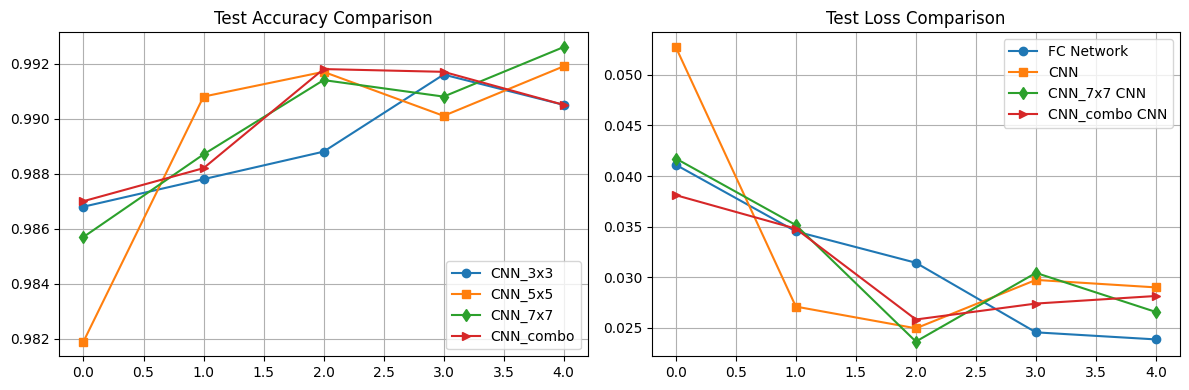

In [29]:
def compare_models(CNN_3x3, CNN_5x5, CNN_7x7, CNN_combo):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(CNN_3x3['test_accs'], label='CNN_3x3', marker='o')
    ax1.plot(CNN_5x5['test_accs'], label='CNN_5x5', marker='s')
    ax1.plot(CNN_7x7['test_accs'], label='CNN_7x7', marker='d')
    ax1.plot(CNN_combo['test_accs'], label='CNN_combo', marker='>')
    ax1.set_title('Test Accuracy Comparison')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(CNN_3x3['test_losses'], label='FC Network', marker='o')
    ax2.plot(CNN_5x5['test_losses'], label='CNN', marker='s')
    ax2.plot(CNN_7x7['test_losses'], label='CNN_7x7 CNN', marker='d')
    ax2.plot(CNN_combo['test_losses'], label='CNN_combo CNN', marker='>')
    ax2.set_title('Test Loss Comparison')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show() 
    
# CNNs = [CNN_3x3, CNN_5x5, CNN_7x7, CNN_combo]
compare_models(CNN_3x3_history, CNN_5x5_history, CNN_7x7_history, CNN_combo_history) 

Время обучение всех моделей заняло почти одинаковое время.

Самая высокая точность у CNN с размером ядра свертки 7 на 7. Все модели в моменте переобучались. Самые плохие плказатели у CNN с размером ядра свертки 3 на 3 и с комбинационным размером свертки

Несмотя на то, что CNN с размером ядра свертки 3 на 3 имееть одну из худших точностей, она также имеет лучшую (наименьшую) функцию потерь. Чуть большую функцию потерь имеет CNN 7 на 7

In [21]:
def visualize_activations(model, test_loader, device):
    model.eval()
    images, _ = next(iter(test_loader))
    images = images.to(device)
    
    # Хуки для захвата активаций
    activations = {}
    def get_activation(name):
        def hook(model, input, output):
            activations[name] = output.detach()
        return hook
    
    model.conv1.register_forward_hook(get_activation('conv1'))
    model(images)
    
    # Визуализация первых 16 фильтров
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for i in range(16):
        ax = axes[i//4, i%4]
        ax.imshow(activations['conv1'][0, i].cpu(), cmap='viridis')
        ax.axis('off')
    plt.show()

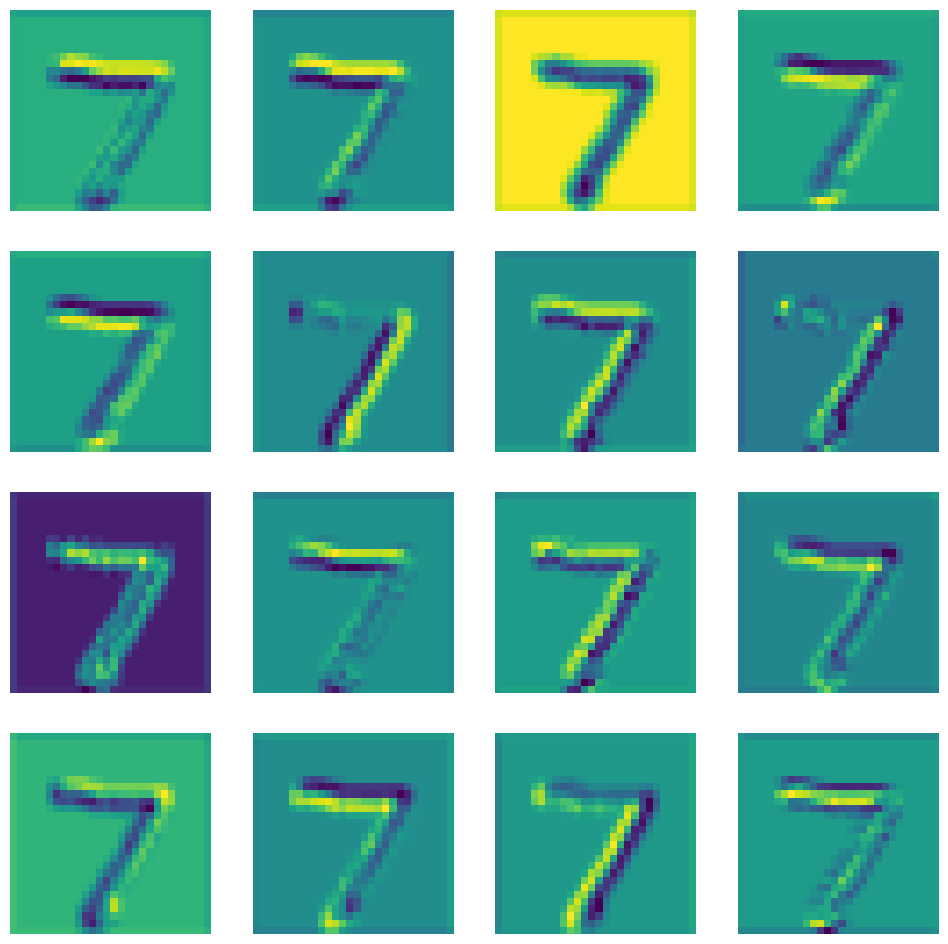

------------------------------------------------------------------------------------------------------------------------------------------------------


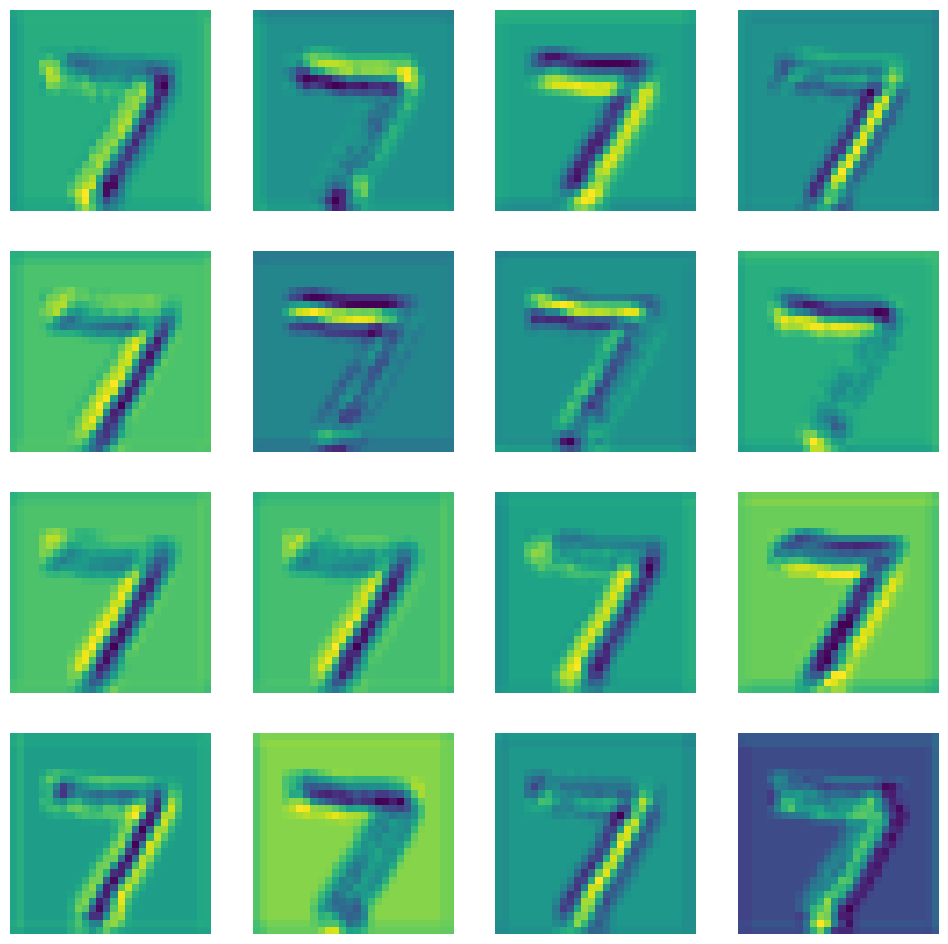

------------------------------------------------------------------------------------------------------------------------------------------------------


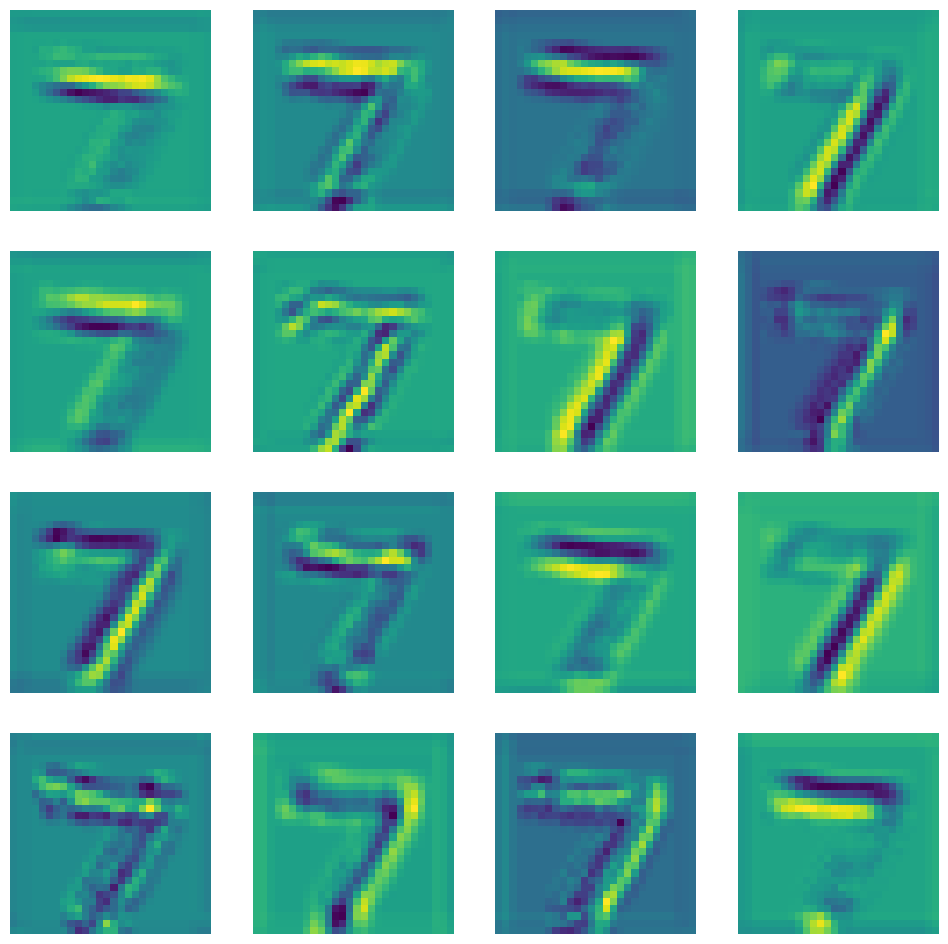

------------------------------------------------------------------------------------------------------------------------------------------------------


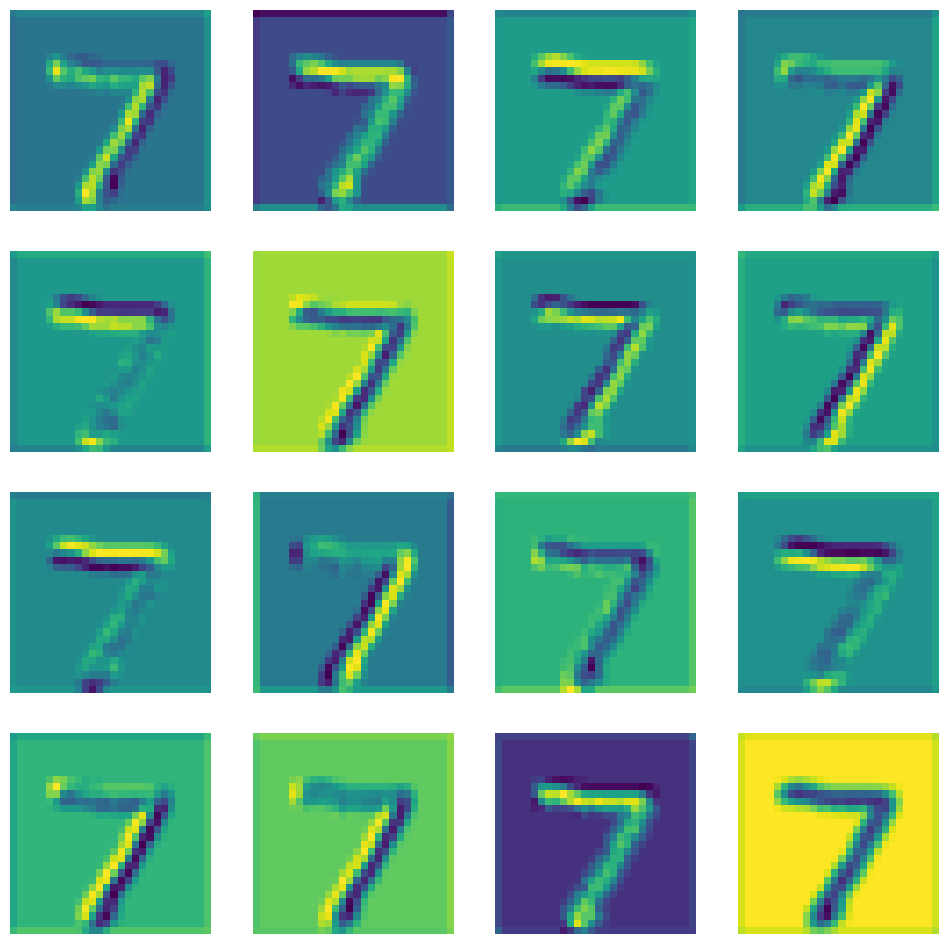

In [25]:
visualize_activations(CNN_3x3, test_loader, device)
print('-' * 150)
visualize_activations(CNN_5x5, test_loader, device)
print('-' * 150)
visualize_activations(CNN_7x7, test_loader, device)
print('-' * 150)
visualize_activations(CNN_combo, test_loader, device)

### 2.2 Влияние глубины CNN (15 баллов)
```python
# Исследуйте влияние глубины CNN:
# - Неглубокая CNN (2 conv слоя)
# - Средняя CNN (4 conv слоя)
# - Глубокая CNN (6+ conv слоев)
# - CNN с Residual связями
# 
# Для каждого варианта:
# - Сравните точность и время обучения
# - Проанализируйте vanishing/exploding gradients
# - Исследуйте эффективность Residual связей
# - Визуализируйте feature maps
```